In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')
print("\nShape of train set:", X_train.shape, Y_train.shape)
print("\nShape of test set:", X_test.shape, Y_test.shape)


Shape of train set: (384, 12) (384, 1)

Shape of test set: (96, 12) (96, 1)


In [3]:
print (X_train.head())

    Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0  LP001032   Male      No  ...              360              1         Urban
1  LP001824   Male     Yes  ...              480              1     Semiurban
2  LP002928   Male     Yes  ...              180              1     Semiurban
3  LP001814   Male     Yes  ...              360              1         Urban
4  LP002244   Male     Yes  ...              360              1         Urban

[5 rows x 12 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa39d3962e8>,
      dtype=object)

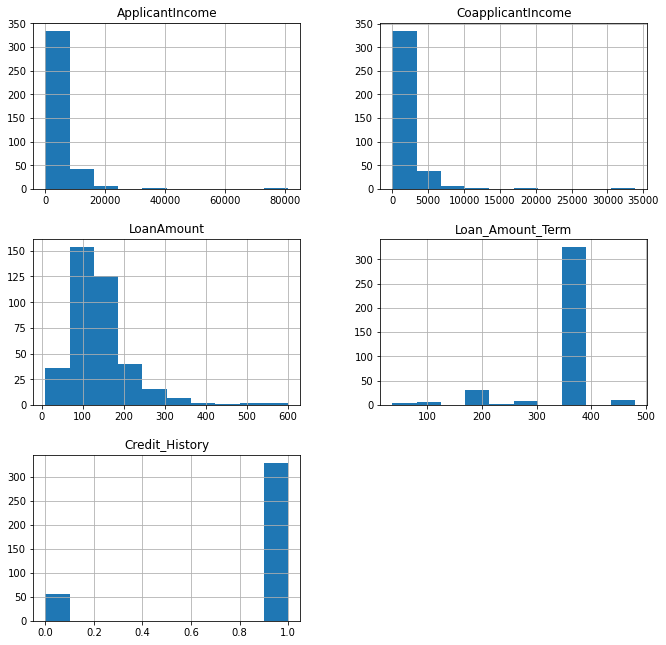

In [4]:
import matplotlib.pyplot as plt

X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

**KNN before Standardizing**

In [7]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],Y_train.values.ravel())

print("\nAccuracy score on test set :", accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']])))
print("\nDistribution of Loan_Status in train set :")
print(Y_train.Target.value_counts()/Y_train.Target.count())



Accuracy score on test set : 0.6145833333333334

Distribution of Loan_Status in train set :
Y    0.705729
N    0.294271
Name: Target, dtype: float64


**Standardizing data**

In [8]:
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])



**After** **Standardizing**

In [16]:
knn_after_std=KNeighborsClassifier(n_neighbors=5)
knn_after_std.fit(X_train_scale,Y_train.values.ravel())
print("\nAccuracy score on test set :", accuracy_score(Y_test,knn_after_std.predict(X_test_scale)))
print("\nDistribution of Loan_Status in train set :")
print(Y_train.Target.value_counts()/Y_train.Target.count())


Accuracy score on test set : 0.71875

Distribution of Loan_Status in train set :
Y    0.705729
N    0.294271
Name: Target, dtype: float64


**Label Encoding**

In [21]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X_test.columns.values:
       if X_test[col].dtypes=='object':
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [23]:
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

**After Encoding**

In [24]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)

accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7395833333333334